## Imorting important library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data

In [133]:
#Loading dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Stroke prediction\healthcare-dataset-stroke-data.csv')

df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1670,34720,Male,45.0,0,1,Yes,Private,Rural,93.77,NaN,Unknown,0
4545,40887,Male,16.0,0,0,No,children,Urban,135.82,35.1,never smoked,0
156,43054,Female,50.0,0,0,Yes,Private,Rural,102.16,31.4,smokes,1
4916,31189,Male,54.0,0,0,Yes,Govt_job,Urban,72.96,37.7,smokes,0
2630,61836,Female,0.8,0,0,No,children,Urban,106.59,15.5,Unknown,0


## Data Preparation

In [134]:
#Dopping id as it is of no use.
df.drop('id',axis='columns',inplace=True)

In [13]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
#Filling the null values
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [17]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [18]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [19]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [20]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

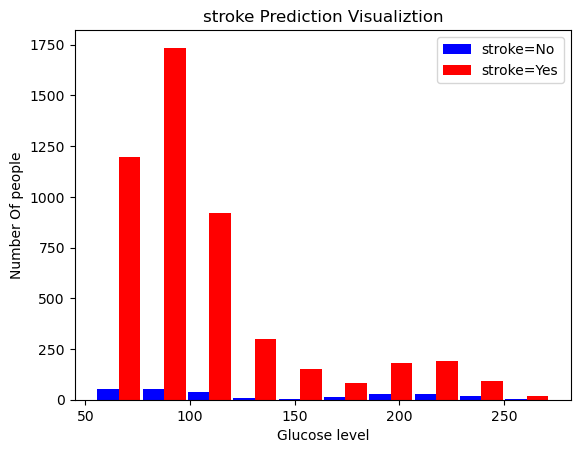

In [132]:
#Data Visualization
gl_stroke_no = df[df.stroke==0].avg_glucose_level
gl_stroke_yes = df[df.stroke==1].avg_glucose_level

plt.xlabel("Glucose level")
plt.ylabel("Number Of people")
plt.title("stroke Prediction Visualiztion")

plt.hist([gl_stroke_yes ,gl_stroke_no], rwidth=0.95, color=['blue','red'] ,label=['stroke=No','stroke=Yes'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [23]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [24]:
yes_no_columns = ['ever_married']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
print_unique_col_values(df)

gender: ['Male' 'Female' 'Other']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [135]:
#Hot encoding
df2 = pd.get_dummies(data=df, columns=['gender','work_type','Residence_type','smoking_status'])
df2.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'bmi', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [27]:
df2.sample(5)

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
882,74.0,1,0,1,57.51,31.7,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4237,63.0,0,0,1,69.46,26.6,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1695,57.0,0,0,1,70.16,25.8,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3622,50.0,0,0,0,112.44,31.5,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
603,23.0,0,0,0,125.26,18.7,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [28]:
df2.dtypes

age                               float64
hypertension                        int64
heart_disease                       int64
ever_married                        int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
gender_Male                         uint8
gender_Other                        uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
work_type_children                  uint8
Residence_type_Rural                uint8
Residence_type_Urban                uint8
smoking_status_Unknown              uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

## Feature Scaling:

In [29]:
cols_to_scale = ['age','avg_glucose_level','bmi']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

age: [8.16894531e-01 7.43652344e-01 9.75585938e-01 5.97167969e-01
 9.63378906e-01 9.87792969e-01 9.02343750e-01 8.41308594e-01
 7.19238281e-01 9.51171875e-01 6.58203125e-01 6.09375000e-01
 7.80273438e-01 9.14550781e-01 7.31445312e-01 6.94824219e-01
 8.65722656e-01 6.33789062e-01 1.00000000e+00 7.92480469e-01
 7.07031250e-01 5.11718750e-01 5.84960938e-01 8.77929688e-01
 7.68066406e-01 9.26757812e-01 4.75097656e-01 9.38964844e-01
 8.90136719e-01 6.82617188e-01 5.48339844e-01 8.53515625e-01
 8.04687500e-01 6.21582031e-01 5.23925781e-01 8.29101562e-01
 5.72753906e-01 6.45996094e-01 4.62890625e-01 6.70410156e-01
 1.51367188e-02 5.60546875e-01 3.89648438e-01 1.69921875e-01
 3.56445312e-02 9.66796875e-02 4.50683594e-01 4.87304688e-01
 4.26269531e-01 2.43164062e-01 5.36132812e-01 3.04199219e-01
 3.28613281e-01 2.79785156e-01 2.06542969e-01 1.57714844e-01
 4.78515625e-02 1.94335938e-01 2.67578125e-01 3.65234375e-01
 3.53027344e-01 1.33300781e-01 2.55371094e-01 2.18750000e-01
 4.01855469e-01 2.9

In [115]:
X = df2.drop(columns=['stroke'])  # Replace 'target_label' with the actual name of your target column
y = df2['stroke']

In [116]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Architecture

In [117]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))


## Compiling the Model 

In [118]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model

In [125]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
128/128 [==============================] - 2s 17ms/step - loss: 0.1595 - accuracy: 0.9543
Epoch 2/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1588 - accuracy: 0.9543
Epoch 3/20
128/128 [==============================] - 2s 15ms/step - loss: 0.1593 - accuracy: 0.9543
Epoch 4/20
128/128 [==============================] - 2s 17ms/step - loss: 0.1566 - accuracy: 0.9543
Epoch 5/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1574 - accuracy: 0.9543
Epoch 6/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1559 - accuracy: 0.9543
Epoch 7/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1559 - accuracy: 0.9543
Epoch 8/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1568 - accuracy: 0.9543
Epoch 9/20
128/128 [==============================] - 2s 17ms/step - loss: 0.1570 - accuracy: 0.9543
Epoch 10/20
128/128 [==============================] - 2s 16ms/step - loss: 0.1565 - accura

## Model Evaluation 

In [129]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

32/32 [==============================] - 0s 7ms/step


In [136]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [137]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
